In [143]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
sys.path.append('C:/Users/mdhor/Documents/GitHub/jaratest/maxh/')
import oddball_analysis_functions as odbl
from jaratoolbox import celldatabase
from jaratoolbox import settings
from jaratoolbox import ephyscore
from jaratoolbox import spikesanalysis
from jaratoolbox import extraplots
from jaratoolbox import behavioranalysis

timeRangePlot = [-0.3, 0.45]
timeRangeStim = [0, 0.1]


subject = 'acid006'

inforecFile = os.path.join(settings.INFOREC_PATH, f'{subject}_inforec.py')

celldb = celldatabase.generate_cell_database(inforecFile)
dbPath = os.path.join(settings.DATABASE_PATH ,f'celldb_{subject}.h5')


# Add info for loading a specific cell.
cellDict = {'subject' : 'acid006',
            'date' : '2023-03-22',
            'pdepth' : 3000,
            'egroup' : 0,
            'cluster' : 232}

cellInd, dbRow = celldatabase.find_cell(celldb, **cellDict)
oneCell = ephyscore.Cell(dbRow)



Generating database for /Users/mdhor/Documents/GitHub/jarainfo/inforecordings\acid006_inforec.py
Adding experiment from acid006 on 2023-03-22


c:\users\mdhor\documents\github\jaratoolbox\jaratoolbox\celldatabase.py:525: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  celldb = celldb.append(tempdb, ignore_index=True)


Raster Plot of spikes during TuningFreq

c:\users\mdhor\documents\github\jaratoolbox\jaratoolbox\extraplots.py:132: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xpos = timeRange[0]+np.array([0, fillWidth, fillWidth, 0])


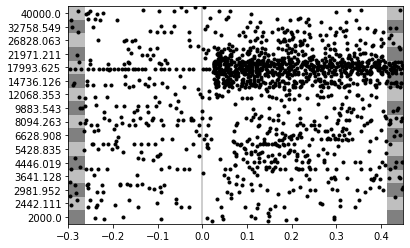

In [144]:
ephysData, bdata = oneCell.load('prePureTones')  
spikeTimes = ephysData['spikeTimes']
eventOnsetTimes = ephysData['events']['stimOn']


frequencies_each_trial = bdata['currentFreq']
array_of_frequencies = np.unique(bdata['currentFreq'])

# Checks to see if trial count from bdata is the same as trial count from ephys
if (len(frequencies_each_trial) > len(eventOnsetTimes)) or (len(frequencies_each_trial) < len(eventOnsetTimes)-1):
    print(f'Warning! BevahTrials ({len(frequencies_each_trial)}) and ' + f'EphysTrials ({len(eventOnsetTimes)})')
    sys.exit()

# If the ephys data is 1 more than the bdata, delete the last ephys trial.
if len(frequencies_each_trial) == len(eventOnsetTimes)-1:
    eventOnsetTimes = eventOnsetTimes[:len(frequencies_each_trial)]

(spikeTimesFromEventOnset, trialIndexForEachSpike, indexLimitsEachTrial) = spikesanalysis.eventlocked_spiketimes(spikeTimes, eventOnsetTimes, timeRangePlot)    

trialsEachCond = behavioranalysis.find_trials_each_type(frequencies_each_trial, array_of_frequencies)




fRaster = extraplots.raster_plot(spikeTimesFromEventOnset, indexLimitsEachTrial, timeRangePlot, trialsEachCond, labels = array_of_frequencies)

Tuning Curve


In [145]:
(spikeTimesStim, trialIndexForEachSpikeStimu, indexLimitsEachTrialStim) = spikesanalysis.eventlocked_spiketimes(spikeTimes, eventOnsetTimes, timeRangeStim)


spikeCountMat = spikesanalysis.spiketimes_to_spikecounts(spikeTimesFromEventOnset, indexLimitsEachTrial, timeRangeStim)

nTrials = len(indexLimitsEachTrial[0])

#get trial index for each condition
trialsEachCondInds, nTrialsEachCond, nCond= extraplots.trials_each_cond_inds(trialsEachCond, nTrials)

firingRates = []
for cond in range(trialsEachCond.shape[1]):
    nSpikesEachTrial = spikeCountMat[trialsEachCond[:,cond]]
    avgSpikes = np.mean(nSpikesEachTrial)
    spikesFiringRate = (avgSpikes / timeRangeStim[1])
    firingRates.append(spikesFiringRate)
   
firingRates

[2.0,
 2.0,
 2.5,
 2.9999999999999996,
 2.9999999999999996,
 6.190476190476191,
 2.9999999999999996,
 2.5,
 0.5,
 4.5,
 29.5,
 47.5,
 18.5,
 2.5,
 2.5,
 2.9999999999999996]

([<matplotlib.lines.Line2D at 0x2312c7342b0>],
 [<matplotlib.lines.Line2D at 0x2312c734a60>])

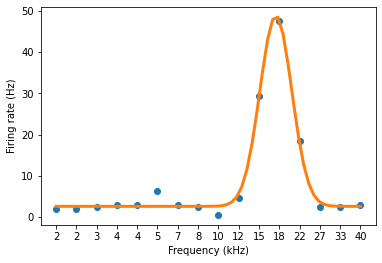

In [146]:
possibleLogFreq = np.log2(array_of_frequencies)



fitParams, RSquared = extraplots.fit_tuning_curve(possibleLogFreq, firingRates)

extraplots.plot_tuning_curve(array_of_frequencies, firingRates, fitParams)

Paired Comparison Plot for change in max firing rate during tuningFreq
(X: saline & doi columns, Y: firing rate)


In [147]:
# Load data for saline, lock spiketimes to event.
if oneCell.get_session_inds('salinePureTones') != []:
    ephysData, bdata = oneCell.load('salinePureTones')  
    spikeTimes = ephysData['spikeTimes']
    eventOnsetTimes = ephysData['events']['stimOn']


    frequencies_each_trial = bdata['currentFreq']
    array_of_frequencies = np.unique(bdata['currentFreq'])

    # Checks to see if trial count from bdata is the same as trial count from ephys
    if (len(frequencies_each_trial) > len(eventOnsetTimes)) or (len(frequencies_each_trial) < len(eventOnsetTimes)-1):
        print(f'Warning! BevahTrials ({len(frequencies_each_trial)}) and ' + f'EphysTrials ({len(eventOnsetTimes)})')
        sys.exit()

    # If the ephys data is 1 more than the bdata, delete the last ephys trial.
    if len(frequencies_each_trial) == len(eventOnsetTimes)-1:
        eventOnsetTimes = eventOnsetTimes[:len(frequencies_each_trial)]

    (spikeTimesFromEventOnset, trialIndexForEachSpike, indexLimitsEachTrial) = spikesanalysis.eventlocked_spiketimes(spikeTimes, eventOnsetTimes, timeRangeStim)    

    trialsEachCondSaline = behavioranalysis.find_trials_each_type(frequencies_each_trial, array_of_frequencies)

    spikeCountMatSaline = spikesanalysis.spiketimes_to_spikecounts(spikeTimesFromEventOnset, indexLimitsEachTrial, timeRangeStim)


# Load data for DOI, lock spiketimes to event.
if oneCell.get_session_inds('doiPureTones') != []:
    ephysData, bdata = oneCell.load('doiPureTones')  
    spikeTimes = ephysData['spikeTimes']
    eventOnsetTimes = ephysData['events']['stimOn']


    frequencies_each_trial = bdata['currentFreq']
    array_of_frequencies = np.unique(bdata['currentFreq'])

    # Checks to see if trial count from bdata is the same as trial count from ephys
    if (len(frequencies_each_trial) > len(eventOnsetTimes)) or (len(frequencies_each_trial) < len(eventOnsetTimes)-1):
        print(f'Warning! BevahTrials ({len(frequencies_each_trial)}) and ' + f'EphysTrials ({len(eventOnsetTimes)})')
        sys.exit()

    # If the ephys data is 1 more than the bdata, delete the last ephys trial.
    if len(frequencies_each_trial) == len(eventOnsetTimes)-1:
        eventOnsetTimes = eventOnsetTimes[:len(frequencies_each_trial)]

    (spikeTimesFromEventOnset, trialIndexForEachSpike, indexLimitsEachTrial) = spikesanalysis.eventlocked_spiketimes(spikeTimes, eventOnsetTimes, timeRangeStim)    

    trialsEachCondDOI = behavioranalysis.find_trials_each_type(frequencies_each_trial, array_of_frequencies)

    spikeCountMatDOI = spikesanalysis.spiketimes_to_spikecounts(spikeTimesFromEventOnset, indexLimitsEachTrial, timeRangeStim)



Calculates the average firing rate for DOI and saline

In [148]:

firingRatesDOI = []
for cond in range(trialsEachCondDOI.shape[1]):
    nSpikesEachTrial = spikeCountMatDOI[trialsEachCondDOI[:,cond]]
    avgSpikes = np.mean(nSpikesEachTrial)
    spikesFiringRate = (avgSpikes / timeRangeStim[1])
    firingRatesDOI.append(spikesFiringRate)

firingRatesSaline = []
for cond in range(trialsEachCondSaline.shape[1]):
    nSpikesEachTrial = spikeCountMatSaline[trialsEachCondSaline[:,cond]]
    avgSpikes = np.mean(nSpikesEachTrial)
    spikesFiringRate = (avgSpikes / timeRangeStim[1])
    firingRatesSaline.append(spikesFiringRate)   

In [33]:
'''
max_value_DOI = 0
max_value_each_cond = []
for cond in range(len(spike_counts_doi)):
    spikes = spike_counts_doi[cond]
    for spike in spikes:
        if spike >= max_value_DOI:
            max_value_DOI = spike
    max_value_each_cond.append(max_value_DOI)
'''


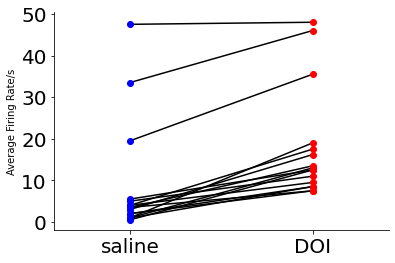

In [149]:

axes = plt.subplot()

barLoc = np.array([-0.24, 0.24])


for spikeAvg in range(len(firingRatesSaline)):
    plt.plot(barLoc, [firingRatesSaline[spikeAvg], firingRatesDOI[spikeAvg]], '-', color = 'black')

plt.plot(np.tile(barLoc[0], len(firingRatesSaline)), firingRatesSaline, 'o', color = 'blue')
plt.plot(np.tile(barLoc[1], len(firingRatesDOI)), firingRatesDOI, 'o', color = 'red')


axes.set_xlim(barLoc[0] - 0.2, barLoc[1] + 0.2)
axes.set_xticks(barLoc)
axes.set_xticklabels(['saline', 'DOI'])
axes.set_ylabel("Average Firing Rate/s")
#axes.set_ylim()

extraplots.boxoff(axes)
extraplots.set_ticks_fontsize(axes, 20)

# pVal = stats.wilcoxon(data[1], data[0])
# print(f"Change in pVal: {pVal}")

# if pVal[1] < 0.05:
#     extraplots.significance_stars(barLoc, 0.98 * yLim[1], 0.02 * np.diff(yLim), gapFactor=0.3)


# def plot_laser_comparison(axes, [spike_average_DOI, spike_average_saline], laserColour, laserFaceColour, yLim, xticklabels):
#     # Function for plot. Change accordingly
# def plot_laser_comparison(axes, data, laserColour, laserFaceColour, yLim, xticklabels):



Above shows the change in avg firing rate, not change in max firing rate.

Paired Comparison Plot for shift in firing rate peak location during tuningFreq
(X: saline & doi columns, Y: frequency



In [ ]:

spike_average_DOI
spike_average_saline

#Calculate peak area. (What if there is no peak?)


plot(X: saline & doi columns, Y: frequency


Oddball Plots

Raster plot of stimulus presentation showing highFreq as Oddball (X: time, y: frequency presented)

EG:   _ _ _ _ - _ _ 

Can use fake data?

Text(0, 0.5, 'Frequency kHz')

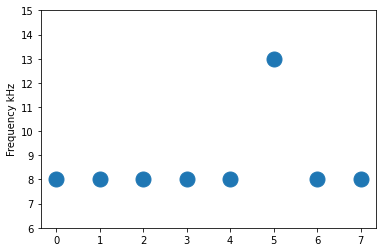

In [195]:



#TrialsByCondition: {[false, false, false ,false ,true, false, false, false],[true, true, true, true, false, true, true ,true]}

trials = (8, 8, 8, 8, 8, 13, 8, 8)

plt.plot(trials, linestyle = '', marker = 'o', markersize = 15 )
plt.ylim(6, 15)
plt.ylabel('Frequency kHz')

#x = time
#Can use fake data or use real times of stimulus presentation


Raster plot of stimulus presentation showing HighFreq as standard (X: time, y: frequency presented) 

eg: - - - - - _ - - - -

Raster plot of oddball vs standard when saline

c:\users\mdhor\documents\github\jaratoolbox\jaratoolbox\extraplots.py:132: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xpos = timeRange[0]+np.array([0, fillWidth, fillWidth, 0])


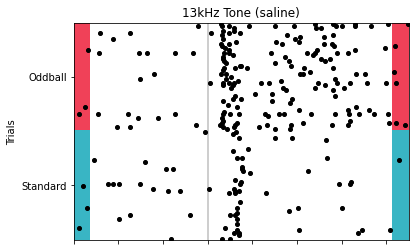

In [150]:
binWidth = 0.010
timeVec = np.arange(timeRangePlot[0],timeRangePlot[-1],binWidth)

if oneCell.get_session_inds('salineHighFreq') != []:
        (combinedSpikeTimesHighSaline, combinedSpikeTimesLowSaline, combinedIndexLimitsHighSaline, combinedIndexLimitsLowSaline, combinedTrialsHighSaline, combinedTrialsLowSaline, spikeCountMatHighSaline, spikeCountMatLowSaline ) = odbl.prepare_plots(oneCell, timeRangePlot, 'salineHighFreq', 'salineLowFreq', timeVec)
        
        # Raster plot of high frequency
        colorsEachCond = ['#39b5c4', '#f04158']
        highFreqLabels = ('Standard', "Oddball")
        ax1 = plt.subplot()
        # plt.xlabel('Time (s)')
        plt.ylabel('Trials')
        plt.title('13kHz Tone (saline)')
        ax1.tick_params(labelbottom=False) 
        pRaster, hcond, zline = extraplots.raster_plot(combinedSpikeTimesHighSaline, combinedIndexLimitsHighSaline, timeRangePlot, combinedTrialsHighSaline, colorsEachCond, labels= highFreqLabels)
        for p in pRaster:
            p.set_markersize(8)

Raster plot of oddball vs standard when DOI

c:\users\mdhor\documents\github\jaratoolbox\jaratoolbox\extraplots.py:132: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xpos = timeRange[0]+np.array([0, fillWidth, fillWidth, 0])


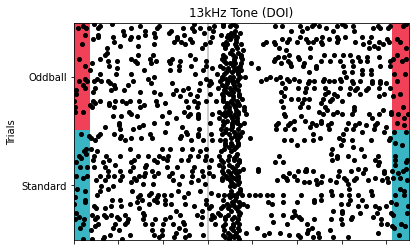

In [151]:
if oneCell.get_session_inds('doiLowFreq') != []:
    (combinedSpikeTimesHighDoi, combinedSpikeTimesLowDoi, combinedIndexLimitsHighDoi, combinedIndexLimitsLowDoi, combinedTrialsHighDoi, combinedTrialsLowDoi, spikeCountMatHighDoi, spikeCountMatLowDoi ) = odbl.prepare_plots(oneCell, timeRangePlot, 'doiHighFreq', 'doiLowFreq', timeVec)

    # Raster plot of high frequency
    colorsEachCond = ['#39b5c4', '#f04158']
    highFreqLabels = ('Standard', "Oddball")
    ax2 = plt.subplot()
    #plt.xlabel('Time (s)')
    plt.ylabel('Trials')
    plt.title('13kHz Tone (DOI)')
    ax2.tick_params(labelbottom=False) 
    pRaster, hcond, zline = extraplots.raster_plot(combinedSpikeTimesHighDoi, combinedIndexLimitsHighDoi, timeRangePlot, combinedTrialsHighDoi, colorsEachCond, labels= highFreqLabels)
    for p in pRaster:
        p.set_markersize(8)

PSTH of oddball vs standard when saline

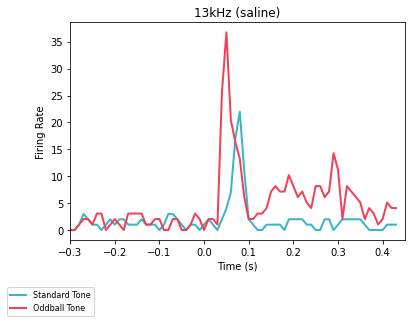

In [152]:
smoothWinSizePsth = 2 
lwPsth = 2
downsampleFactorPsth = 1

ax3 = plt.subplot(sharex=ax1)    
extraplots.plot_psth(spikeCountMatHighSaline/binWidth, smoothWinSizePsth, timeVec, combinedTrialsHighSaline, colorsEachCond, linestyle=None, linewidth=lwPsth, downsamplefactor=downsampleFactorPsth)
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate')
plt.title('13kHz (saline)')
plt.legend(("Standard Tone", "Oddball Tone"), bbox_to_anchor=(-0.20, -0.20), loc = 'upper left', fontsize = 8)

PSTH of oddball vs standard when DOI

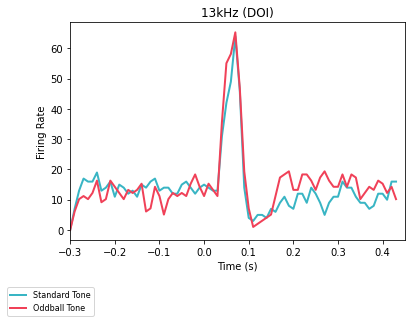

In [153]:
ax4 = plt.subplot(sharex=ax2)    
extraplots.plot_psth(spikeCountMatHighDoi/binWidth, smoothWinSizePsth, timeVec, combinedTrialsHighDoi, colorsEachCond, linestyle=None, linewidth=lwPsth, downsamplefactor=downsampleFactorPsth)
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate')
plt.title('13kHz (DOI)')
plt.legend(("Standard Tone", "Oddball Tone"), bbox_to_anchor=(-0.20, -0.20), loc = 'upper left', fontsize = 8)

Plot showing the change in index ((odd-stand)/(odd+stand)) between saline and DOI (x: saline-doi columns, y: index between -1 and 1) for multiple sessions. 

In [154]:
#Calculate index for highFreq saline:


spikeTimesFromEventOnsetHigh, trialIndexForEachSpikeHigh, indexLimitsEachTrialHigh, lowFreqStandard, highFreqOdd = odbl.main_function(oneCell, 'salineHighFreq', timeRangeStim)
spikeTimesFromEventOnsetLow, trialIndexForEachSpikeLow, indexLimitsEachTrialLow, lowFreqOdd, highFreqStandard = odbl.main_function(oneCell, 'salineLowFreq', timeRangeStim)

trialsBeforeOddLowStd = odbl.trials_before_oddball(highFreqOdd)       
trialsBeforeOddHighStd = odbl.trials_before_oddball(lowFreqOdd)

spikeCountMatHigh = spikesanalysis.spiketimes_to_spikecounts(spikeTimesFromEventOnsetHigh, indexLimitsEachTrialHigh, timeRangeStim)
spikeCountMatLow = spikesanalysis.spiketimes_to_spikecounts(spikeTimesFromEventOnsetLow, indexLimitsEachTrialLow, timeRangeStim)


for cond in range(highFreqOdd.shape[1]):
    nSpikesEachTrial = spikeCountMatHigh[highFreqOdd[:,cond]]
    avgSpikes = np.mean(nSpikesEachTrial)
    avgFiringRateOdd = (avgSpikes / timeRangeStim[1])
  

for cond in range(trialsBeforeOddHighStd.shape[1]):
    nSpikesEachTrial = spikeCountMatHigh[trialsBeforeOddHighStd[:,cond]]
    avgSpikes = np.mean(nSpikesEachTrial)
    avgFiringRateStandard = (avgSpikes / timeRangeStim[1])



salineIndex = (avgFiringRateOdd - avgFiringRateStandard)/(avgFiringRateOdd + avgFiringRateStandard)

salineIndex


0.1687087653157399

In [155]:
#Calculate index for highFreq DOI:

spikeTimesFromEventOnsetHigh, trialIndexForEachSpikeHigh, indexLimitsEachTrialHigh, lowFreqStandard, highFreqOdd = odbl.main_function(oneCell, 'doiHighFreq', timeRangeStim)
spikeTimesFromEventOnsetLow, trialIndexForEachSpikeLow, indexLimitsEachTrialLow, lowFreqOdd, highFreqStandard = odbl.main_function(oneCell, 'doiLowFreq', timeRangeStim)

trialsBeforeOddLowStd = odbl.trials_before_oddball(highFreqOdd)       
trialsBeforeOddHighStd = odbl.trials_before_oddball(lowFreqOdd)

spikeCountMatHigh = spikesanalysis.spiketimes_to_spikecounts(spikeTimesFromEventOnsetHigh, indexLimitsEachTrialHigh, timeRangeStim)
spikeCountMatLow = spikesanalysis.spiketimes_to_spikecounts(spikeTimesFromEventOnsetLow, indexLimitsEachTrialLow, timeRangeStim)


for cond in range(highFreqOdd.shape[1]):
    nSpikesEachTrial = spikeCountMatHigh[highFreqOdd[:,cond]]
    avgSpikes = np.mean(nSpikesEachTrial)
    avgFiringRateOdd = (avgSpikes / timeRangeStim[1])
  

for cond in range(trialsBeforeOddHighStd.shape[1]):
    nSpikesEachTrial = spikeCountMatHigh[trialsBeforeOddHighStd[:,cond]]
    avgSpikes = np.mean(nSpikesEachTrial)
    avgFiringRateStandard = (avgSpikes / timeRangeStim[1])



doiIndex = (avgFiringRateOdd - avgFiringRateStandard)/(avgFiringRateOdd + avgFiringRateStandard)

doiIndex

0.07761560496521627

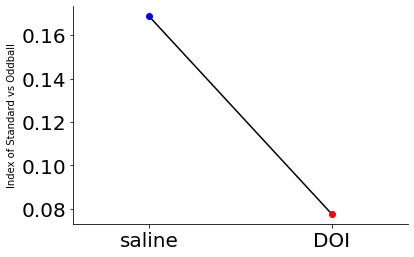

In [156]:
#Comparison plot

axes = plt.subplot()

barLoc = np.array([-0.24, 0.24])


plt.plot(barLoc, [salineIndex, doiIndex], '-', color = 'black')

plt.plot(np.tile(barLoc[0], salineIndex.shape), salineIndex, 'o', color = 'blue')
plt.plot(np.tile(barLoc[1], doiIndex.shape), doiIndex, 'o', color = 'red')


axes.set_xlim(barLoc[0] - 0.2, barLoc[1] + 0.2)
axes.set_xticks(barLoc)
axes.set_xticklabels(['saline', 'DOI'])
axes.set_ylabel("Index of Standard vs Oddball")
#axes.set_ylim()

extraplots.boxoff(axes)
extraplots.set_ticks_fontsize(axes, 20)

In [ ]:




if oneCell.get_session_inds('salineHighFreq') != []:
    ephysData, bdata = oneCell.load('salineHighFreq')  
    spikeTimes = ephysData['spikeTimes']
    eventOnsetTimes = ephysData['events']['stimOn']


    frequencies_each_trial = bdata['currentFreq']
    array_of_frequencies = np.unique(bdata['currentFreq'])

    # Checks to see if trial count from bdata is the same as trial count from ephys
    if (len(frequencies_each_trial) > len(eventOnsetTimes)) or (len(frequencies_each_trial) < len(eventOnsetTimes)-1):
        print(f'Warning! BevahTrials ({len(frequencies_each_trial)}) and ' + f'EphysTrials ({len(eventOnsetTimes)})')
        sys.exit()

    # If the ephys data is 1 more than the bdata, delete the last ephys trial.
    if len(frequencies_each_trial) == len(eventOnsetTimes)-1:
        eventOnsetTimes = eventOnsetTimes[:len(frequencies_each_trial)]

    (spikeTimesFromEventOnset, trialIndexForEachSpike, indexLimitsEachTrial) = spikesanalysis.eventlocked_spiketimes(spikeTimes, eventOnsetTimes, timeRangeStim)    

    trialsEachCondSaline = behavioranalysis.find_trials_each_type(frequencies_each_trial, array_of_frequencies)

    spikeCountMatSaline = spikesanalysis.spiketimes_to_spikecounts(spikeTimesFromEventOnset, indexLimitsEachTrial, timeRangeStim)






# Do the same for saline and for DOI

salineIndex = (firingRateOdd - firingRateStandard)/(firingRateOdd + firingRateStandard)



plot_laser_comparison(axes, [spike_average_DOI, spike_average_saline], laserColour, laserFaceColour, yLim, xticklabels)


In [ ]:
# Load data for saline, lock spiketimes to event.

spikeTimesFromEventOnset, trialIndexForEachSpike, indexLimitsEachTrial, trialsLowFreq, trialsHighFreq = odbl.main_function(oneCell, 'salineHighFreq', timeRangeStim)
if oneCell.get_session_inds('salineHighFreq') != []:
    ephysData, bdata = oneCell.load('salineHighFreq')  
    spikeTimes = ephysData['spikeTimes']
    eventOnsetTimes = ephysData['events']['stimOn']


    frequencies_each_trial = bdata['currentFreq']
    array_of_frequencies = np.unique(bdata['currentFreq'])

    # Checks to see if trial count from bdata is the same as trial count from ephys
    if (len(frequencies_each_trial) > len(eventOnsetTimes)) or (len(frequencies_each_trial) < len(eventOnsetTimes)-1):
        print(f'Warning! BevahTrials ({len(frequencies_each_trial)}) and ' + f'EphysTrials ({len(eventOnsetTimes)})')
        sys.exit()

    # If the ephys data is 1 more than the bdata, delete the last ephys trial.
    if len(frequencies_each_trial) == len(eventOnsetTimes)-1:
        eventOnsetTimes = eventOnsetTimes[:len(frequencies_each_trial)]

    (spikeTimesFromEventOnset, trialIndexForEachSpike, indexLimitsEachTrial) = spikesanalysis.eventlocked_spiketimes(spikeTimes, eventOnsetTimes, timeRangeStim)    

    trialsEachCondSaline = behavioranalysis.find_trials_each_type(frequencies_each_trial, array_of_frequencies)

    spikeCountMatSaline = spikesanalysis.spiketimes_to_spikecounts(spikeTimesFromEventOnset, indexLimitsEachTrial, timeRangeStim)


# Load data for DOI, lock spiketimes to event.
if oneCell.get_session_inds('doiPureTones') != []:
    ephysData, bdata = oneCell.load('doiPureTones')  
    spikeTimes = ephysData['spikeTimes']
    eventOnsetTimes = ephysData['events']['stimOn']


    frequencies_each_trial = bdata['currentFreq']
    array_of_frequencies = np.unique(bdata['currentFreq'])

    # Checks to see if trial count from bdata is the same as trial count from ephys
    if (len(frequencies_each_trial) > len(eventOnsetTimes)) or (len(frequencies_each_trial) < len(eventOnsetTimes)-1):
        print(f'Warning! BevahTrials ({len(frequencies_each_trial)}) and ' + f'EphysTrials ({len(eventOnsetTimes)})')
        sys.exit()

    # If the ephys data is 1 more than the bdata, delete the last ephys trial.
    if len(frequencies_each_trial) == len(eventOnsetTimes)-1:
        eventOnsetTimes = eventOnsetTimes[:len(frequencies_each_trial)]

    (spikeTimesFromEventOnset, trialIndexForEachSpike, indexLimitsEachTrial) = spikesanalysis.eventlocked_spiketimes(spikeTimes, eventOnsetTimes, timeRangeStim)    

    trialsEachCondDOI = behavioranalysis.find_trials_each_type(frequencies_each_trial, array_of_frequencies)

    spikeCountMatDOI = spikesanalysis.spiketimes_to_spikecounts(spikeTimesFromEventOnset, indexLimitsEachTrial, timeRangeStim)